<a href="https://colab.research.google.com/github/sandyzgomes/salesanalysis-RFM-Cluster/blob/main/Sales_Analysis_RFM_Model_Cluster_with_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sumário:**

1. Análise Exploratória, Limpeza de Dados e Criação de Novas Colunas

2. Análise de Vendas

3. Segmentação e Clusterização de Clientes

4. Estratégia de Vendas para Segmentos de Clientes


In [ ]:
# Import Libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install chart_studio
import datetime as dt

print("Setup Complete")

     |████████████████████████████████| 64 kB 1.2 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=e065b39bb5f9e434d4030a99a953328b53f1e992939bf7d16484e1baee70bb9d
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Setup Complete


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

# Load Data
df = pd.read_csv('/content/drive/My Drive/content/transaction_data.csv')

Mounted at /content/drive


**1. Análise Exploratória e Limpeza de Dados**

In [ ]:
#Check for missing values in the dataset
df.isnull().sum(axis=0)

UserId                       0
TransactionId                0
TransactionTime              0
ItemCode                     0
ItemDescription           2908
NumberOfItemsPurchased       0
CostPerItem                  0
Country                      0
dtype: int64

In [ ]:
# Convert Columns to the correct Type
df['TransactionTime'] = pd.to_datetime(df['TransactionTime'])

df.info()

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   UserId                  1083818 non-null  int64         
 1   TransactionId           1083818 non-null  int64         
 2   TransactionTime         1083818 non-null  datetime64[ns]
 3   ItemCode                1083818 non-null  int64         
 4   ItemDescription         1080910 non-null  object        
 5   NumberOfItemsPurchased  1083818 non-null  int64         
 6   CostPerItem             1083818 non-null  float64       
 7   Country                 1083818 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 66.2+ MB


In [ ]:
#Validate if there are any negative values in columns
df.UserId.min()

-1

In [ ]:
df.TransactionId.min()

5900015

In [ ]:
df.ItemCode.min()

-1

In [ ]:
df.NumberOfItemsPurchased.min()

-242985

In [ ]:
df.CostPerItem.min()


-15265.64

In [ ]:
#Filter out records with negative values
df = df[(df['UserId']>0)]
df = df[(df['ItemCode']>0)]
df = df[(df['NumberOfItemsPurchased']>0)]
df = df[(df['CostPerItem']>0)]

In [ ]:
# Obs.: We have to add: Day Column, Month Column, Year Column and Sales Amount column.

df['Transaction Day'] = df['TransactionTime'].dt.weekday
df['Transaction Month'] = df['TransactionTime'].dt.month
df['Transaction Year'] = df['TransactionTime'].dt.year
df['Sales Amount'] = df['NumberOfItemsPurchased'] * df['CostPerItem']

df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Transaction Day,Transaction Month,Transaction Year,Sales Amount
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,5,2,2019,70.38
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,2,12,2018,10.56
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,4,2,2019,64.80
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,4,6,2018,5.19
5,285957,6307136,2019-01-11 09:50:00,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,4,1,2019,42.24


In [ ]:
# Delete wrong year
df_new = df.loc[df['Transaction Year']!=2028]

**2. Análise de Vendas**

**2.1 Quantidade de Clientes por País**


In [ ]:
country_cust_data=df_new[['Country','UserId']].drop_duplicates()
country_cust_data.groupby(['Country'])['UserId'].aggregate('count').reset_index().sort_values('UserId', ascending=False)

# The country with the largest number of customers is the United Kingdom.

,Country,UserId
35,United Kingdom,3911
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,14
12,Finland,12
1,Austria,11


**2.2 Total de Vendas por País**


In [ ]:
# 2.2 Sales by Country
country_sales=df_new[['Country','Sales Amount']].drop_duplicates()
country_sales.groupby(['Country'])['Sales Amount'].aggregate('sum').reset_index().sort_values('Sales Amount', ascending=False)

,Country,Sales Amount
35,United Kingdom,45069108.81
23,Netherlands,286353.36
10,EIRE,279551.97
0,Australia,250909.74
14,Germany,124497.24
13,France,115675.92
19,Japan,104944.62
30,Spain,66226.44
31,Sweden,65649.48
32,Switzerland,58909.95


**2.3 Análise de Tendência**

In [ ]:
# Getting month year from order_date
df_new['Month_Year'] = df_new['TransactionTime'].apply(lambda x: x.strftime('%Y-%m'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# grouping month_year by sales
df_temp = df_new.groupby('Month_Year').sum()['Sales Amount'].reset_index()

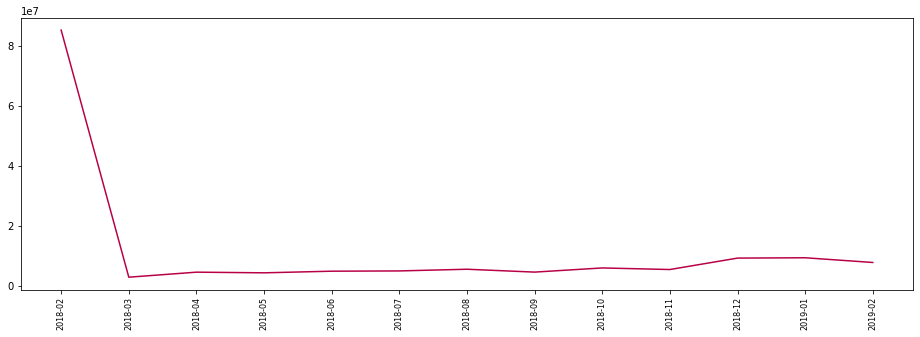

In [ ]:
# Setting the figure size
plt.figure(figsize=(16, 5))
plt.plot(df_temp['Month_Year'], df_temp['Sales Amount'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

**2.4 Qual o produto mais vendido no UK?**

In [ ]:
# Keep an eye on United Kingdom
df_UK = df_new.query("Country=='United Kingdom'").reset_index(drop=True)

# Wich are the most popular products in UK?
uk_product = df_UK.groupby(['ItemCode','ItemDescription'],as_index= False)['NumberOfItemsPurchased'].sum().sort_values(by='NumberOfItemsPurchased', ascending=False)
uk_product.head(5)

,ItemCode,ItemDescription,NumberOfItemsPurchased
2588,500703,"PAPER CRAFT , LITTLE BIRDIE",485970
2090,486486,MEDIUM CERAMIC TOP STORAGE JAR,461514
3004,1765617,WORLD WAR 2 GLIDERS ASSTD DESIGNS,294804
3427,1787079,JUMBO BAG RED RETROSPOT,249936
3441,1787583,WHITE HANGING HEART T-LIGHT HOLDER,205956


**Qual o produto menos vendido no UK?**

In [ ]:
uk_product.tail(5)

,ItemCode,ItemDescription,NumberOfItemsPurchased
1124,466578,CAKE STAND LACE WHITE,6
2622,748545,VINTAGE BEAD PINK JEWEL BOX,6
3699,1892688,BLUE LEAVES AND BEADS PHONE CHARM,6
870,459795,POTTING SHED SOW 'N' GROW SET,6
3124,1776873,BLUE NEW BAROQUE FLOCK CANDLESTICK,6


**2.6 Visão Geral: Agrupamento de Produtos por Vendas Realizadas (Sales Amount) | TOP 10**

In [ ]:
prod_sales = pd.DataFrame(df_new.groupby('ItemDescription').sum()['Sales Amount'])

# Sorting the dataframe in descending order
prod_sales.sort_values(by=['Sales Amount'], inplace=True, ascending=False)

# Top 10 products by sales
prod_sales[:10]

# Add Coments

,Sales Amount
ItemDescription,
RETROSPOT LAMP,81445586.76
"PAPER CRAFT , LITTLE BIRDIE",1399593.60
REGENCY CAKESTAND 3 TIER,1171980.18
WHITE HANGING HEART T-LIGHT HOLDER,825642.24
JUMBO BAG RED RETROSPOT,703389.24
MEDIUM CERAMIC TOP STORAGE JAR,676376.70
PARTY BUNTING,570567.18
ASSORTED COLOUR BIRD ORNAMENT,466747.56
RABBIT NIGHT LIGHT,426722.28


**2.7 Visão Geral: Agrupamento de Produtos por Quantidades Vendidas | TOP 10**

In [ ]:
# 2.7 Overall: Grouping products by Quantity
best_selling_prods = pd.DataFrame(df_new.groupby('ItemDescription').sum()['NumberOfItemsPurchased'])

# Sorting the dataframe in descending order
best_selling_prods.sort_values(by=['NumberOfItemsPurchased'], inplace=True, ascending=False)

# Most selling products
best_selling_prods[:10]

# Add Coments

,NumberOfItemsPurchased
ItemDescription,
"PAPER CRAFT , LITTLE BIRDIE",485970
MEDIUM CERAMIC TOP STORAGE JAR,467496
WORLD WAR 2 GLIDERS ASSTD DESIGNS,326202
JUMBO BAG RED RETROSPOT,275136
WHITE HANGING HEART T-LIGHT HOLDER,218418
ASSORTED COLOUR BIRD ORNAMENT,210546
PACK OF 72 RETROSPOT CAKE CASES,201288
POPCORN HOLDER,185586
RABBIT NIGHT LIGHT,163212


**2.8 Produtos que são mais prováveis de serem vendidos juntos**

In [ ]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df_new = df_new[df_new['TransactionId'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df_new['Grouped'] = df_new.groupby('TransactionId')['ItemDescription'].transform(lambda x: ','.join(x))
df_new_2 = df_new[['TransactionId', 'Grouped']].drop_duplicates()

In [ ]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_new_2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('KEY FOB ', 'KEY FOB ') 3353
('WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE HANGING HEART T-LIGHT HOLDER') 2267
('REGENCY CAKESTAND 3 TIER', 'REGENCY CAKESTAND 3 TIER') 1805
('JUMBO BAG RED RETROSPOT', 'JUMBO BAG RED RETROSPOT') 1689
('KEY FOB ', ' SHED') 1598
('ASSORTED COLOUR BIRD ORNAMENT', 'ASSORTED COLOUR BIRD ORNAMENT') 1545
('KEY FOB ', ' BACK DOOR ') 1520
('GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER') 1488
('PARTY BUNTING', 'PARTY BUNTING') 1468
('LUNCH BAG RED RETROSPOT', 'LUNCH BAG RED RETROSPOT') 1427


**2.9 Qual melhor horário do dia para investir em mídia paga?**

In [ ]:
# Add Hour Time Column

df_new['Hour'] = pd.to_datetime(df_new['TransactionTime']).dt.hour
df_new['Minute'] = pd.to_datetime(df_new['TransactionTime']).dt.minute
df_new['Count'] = 1
df_new.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Transaction Day,Transaction Month,Transaction Year,Sales Amount,month_year,Month_Year,Grouped,Hour,Minute,Count
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,5,2,2019,70.38,2019-02,2019-02,"FAMILY ALBUM WHITE PICTURE FRAME,JINGLE BELL H...",12,50,1
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,2,12,2018,10.56,2018-12,2018-12,"LONDON BUS COFFEE MUG,SET OF 72 PINK HEART PAP...",9,6,1
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,4,2,2019,64.80,2019-02,2019-02,"SET 12 COLOUR PENCILS DOLLY GIRL ,PICTURE DOMI...",9,45,1
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,4,6,2018,5.19,2018-06,2018-06,"UNION JACK FLAG LUGGAGE TAG,RED FLOWER CROCHET...",7,14,1
5,285957,6307136,2019-01-11 09:50:00,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,4,1,2019,42.24,2019-01,2019-01,"CUT GLASS T-LIGHT HOLDER OCTAGON,GLITTER CHRIS...",9,50,1


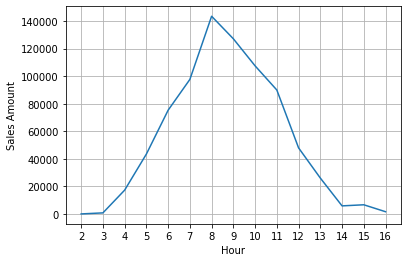

In [ ]:
keys = [hour for hour, df_new in df_new.groupby(['Hour'])]

plt.plot(keys, df_new.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.xlabel('Hour')
plt.ylabel('Sales Amount')
plt.grid()
plt.show()

# Add Coments

**3. Segmentação e Clusterização de Clientes**

In [ ]:
# Keep an eye on United Kingdom
df_UK = df_new.query("Country=='United Kingdom'").reset_index(drop=True)

**RFM Model**

In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 

#Amount for each customer

import datetime as dt

#Set Latest date 2019-02-15 as last invoice date was 2019-02-15. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2019,3,31)

#Create RFM Modelling scores for each customer
rfm = df_UK.groupby('UserId').agg({'TransactionTime': lambda x: (Latest_Date - x.max()).days, 'TransactionId': lambda x: len(x), 'Sales Amount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm['TransactionTime'] = rfm['TransactionTime'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm.rename(columns={'TransactionTime': 'Recency', 
                         'TransactionId': 'Frequency', 
                         'Sales Amount': 'Monetary'}, inplace=True)

rfm.reset_index().head()

,UserId,Recency,Frequency,Monetary
0,259266,363,2,641217.60
1,267687,40,206,34785.78
2,267708,38,9042,265665.72
3,267729,41,398,33914.88
4,269220,41,118,7821.24


**3.1 Interpretação**

CustomerID 259266 has frequency: 2, monetary value: $641217.60 and recency: 363 days.

In [ ]:
first_customer = df_new[df_new['UserId']== 259266]
first_customer

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Transaction Day,Transaction Month,Transaction Year,Sales Amount,month_year,Month_Year,Grouped,Hour,Minute,Count,Amount
528376,259266,5955741,2018-04-01 06:01:00,486486,MEDIUM CERAMIC TOP STORAGE JAR,222645,1.44,United Kingdom,6,4,2018,320608.8,2018-04,2018-04,"MEDIUM CERAMIC TOP STORAGE JAR,MEDIUM CERAMIC ...",6,1,1,320608.8
1010231,259266,5955741,2018-04-01 06:01:00,486486,MEDIUM CERAMIC TOP STORAGE JAR,222645,1.44,United Kingdom,6,4,2018,320608.8,2018-04,2018-04,"MEDIUM CERAMIC TOP STORAGE JAR,MEDIUM CERAMIC ...",6,1,1,320608.8


**3.2 Observação:**

The first customer has twice, bought one item at a huge quantity. The unit price is very low, seems a clearance sale.


In [ ]:
#Building RFM segments
r_labels =range(4,0,-1)
f_labels=range(1,5)
m_labels=range(1,5)
r_quartiles = pd.qcut(rfm['Recency'], q=4, labels = r_labels)
f_quartiles = pd.qcut(rfm['Frequency'],q=4, labels = f_labels)
m_quartiles = pd.qcut(rfm['Monetary'],q=4,labels = m_labels)
rfm = rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)

#Build RFM Segment and RFM Score
def add_rfm(x) : return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(add_rfm,axis=1 )
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
UserId,,,,,,,,
259266,363,2,641217.60,1,1,4,114,6
267687,40,206,34785.78,4,4,4,444,12
267708,38,9042,265665.72,4,4,4,444,12
267729,41,398,33914.88,4,4,4,444,12
269220,41,118,7821.24,4,3,3,433,10


**3.3 What is the Monetary AVG for the segment with RFM_Score of 12?**


In [ ]:
# What is the average MonetaryValue for the segment with RFM_Score of 12?

monetary_value_12 = rfm[rfm.RFM_Score == 12].Monetary.mean()
print(f'The average monetary value for a RFM score of 12 is $ {monetary_value_12:.0f}')

The average monetary value for a RFM score of 12 is $ 67188


In [ ]:
rfm.groupby(['RFM_Segment']).size().sort_values(ascending=False)[:5]

RFM_Segment
444    407
111    339
344    185
122    183
211    169
dtype: int64

In [ ]:
#Select bottom RFM segment "111" and view top 5 rows
rfm[rfm['RFM_Segment']=='111'].head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
UserId,,,,,,,,
269241,252,12,769.56,1,1,1,111,3
269409,374,22,2435.40,1,1,1,111,3
269451,300,18,1785.36,1,1,1,111,3
269577,211,24,1111.32,1,1,1,111,3
269955,410,6,316.80,1,1,1,111,3


In [ ]:
#Select bottom RFM segment "444" and view top 5 rows
rfm[rfm['RFM_Segment']=='444'].head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
UserId,,,,,,,,
267687,40,206,34785.78,4,4,4,444,12
267708,38,9042,265665.72,4,4,4,444,12
267729,41,398,33914.88,4,4,4,444,12
269619,40,584,43093.98,4,4,4,444,12
269661,42,840,33383.46,4,4,4,444,12


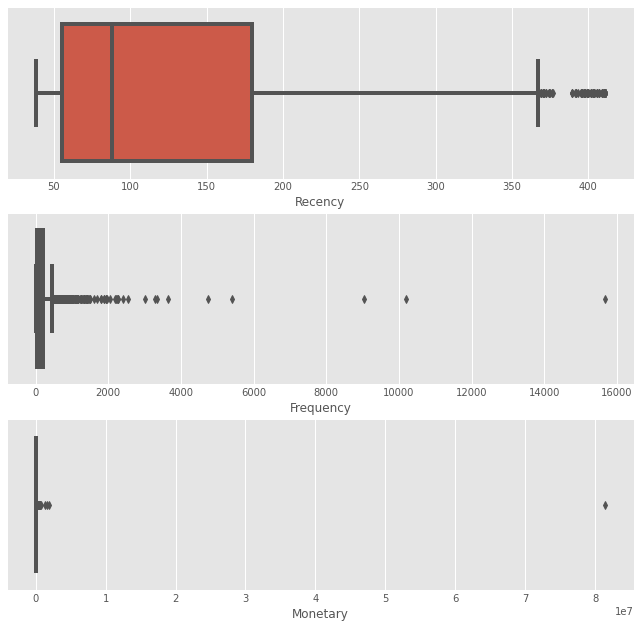

In [ ]:
# Plot recency, freqiency and moneatry distribution
fig,ax=plt.subplots(3,1)
fig.set_size_inches(w=10,h=10)
sns.boxplot(x='Recency',data=rfm,ax=fig.axes[0])
sns.boxplot(x='Frequency',data=rfm,ax=fig.axes[1])
sns.boxplot(x='Monetary',data=rfm,ax=fig.axes[2])

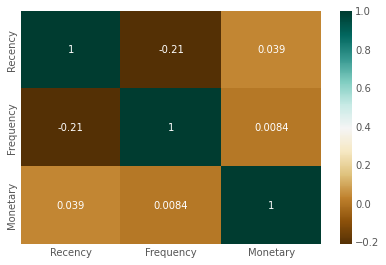

In [ ]:
c= rfm[['Recency','Frequency','Monetary']].corr()
sns.heatmap(data=c,cmap="BrBG",annot=True)
plt.show()

**3.4 Observation:**

Frequency and monetary value are positively correlated with each other implying an increase in frequency implies increase in monetary value
Frequency and Recency are negatively correlated with each other implying an increase in frequency implies decrease in monetary value



In [ ]:
def segments(df):
    if df['RFM_Score'] > 9 :
        return 'Gold'
    elif (df['RFM_Score'] > 5) and (df['RFM_Score'] <= 9 ):
        return 'Sliver'
    else:  
        return 'Bronze'

rfm['General_Segment'] = rfm.apply(segments,axis=1)

rfm.groupby('General_Segment').agg({'Recency':'mean','Frequency':'mean',
                                    'Monetary':['mean','count']}).round(1)

Recency Frequency Monetary      
                   mean      mean     mean count
General_Segment                                 
Bronze            227.2      30.1   2153.1  1172
Gold               57.2     449.6  38069.8  1138
Sliver            109.5      99.4  59622.7  1601

In [ ]:
rfm_rfm = rfm[['Recency','Frequency','Monetary']]
print(rfm_rfm.describe())

           Recency     Frequency      Monetary
count  3911.000000   3911.000000  3.911000e+03
mean    129.535157    180.523651  3.612958e+04
std      99.294726    434.531055  1.303079e+06
min      38.000000      2.000000  3.114000e+01
25%      55.000000     34.000000  2.493180e+03
50%      88.000000     82.000000  5.411220e+03
75%     180.000000    198.000000  1.302501e+04
max     411.000000  15676.000000  8.142170e+07


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

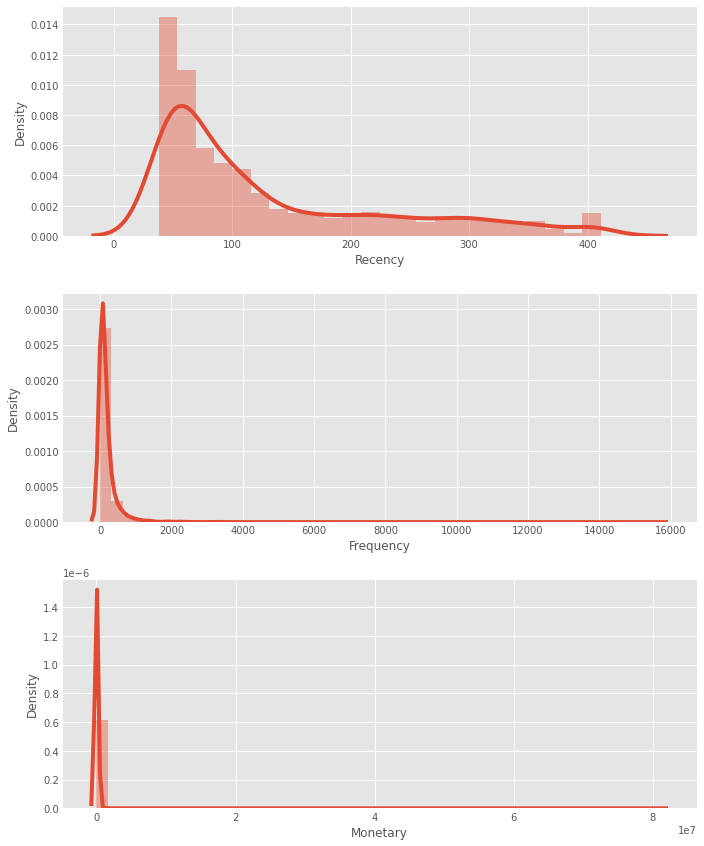

In [ ]:
# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfm.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm.Monetary, label = 'Monetary')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

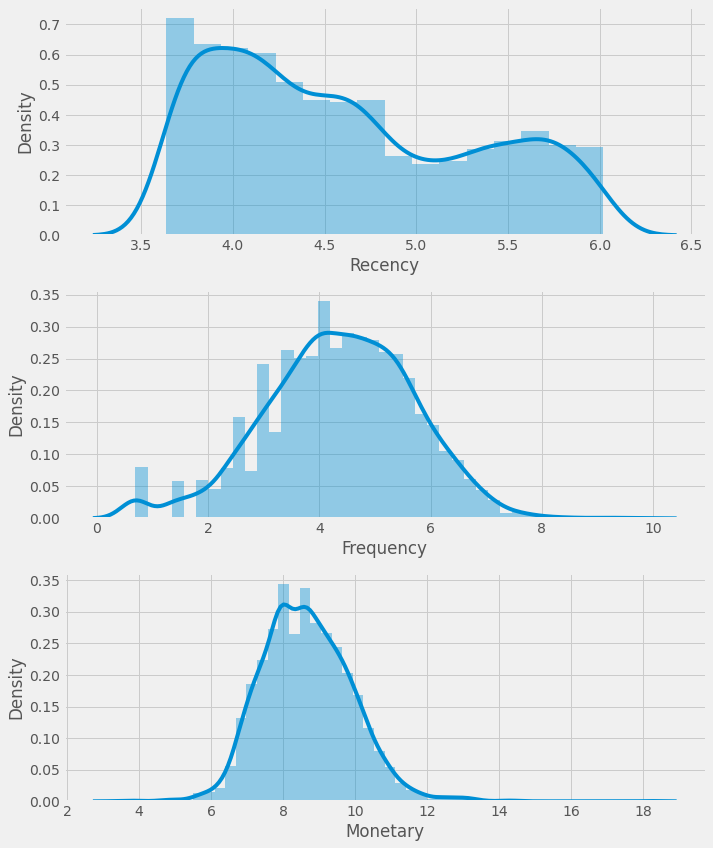

In [ ]:
#Unskew the data with log transformation
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)
#or rfm_log = np.log(rfm_rfm)


# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfm_log.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_log.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_log.Monetary, label = 'Monetary')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [ ]:
#Normalize the variables with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)
#Store it separately for clustering
rfm_normalized= scaler.transform(rfm_log)

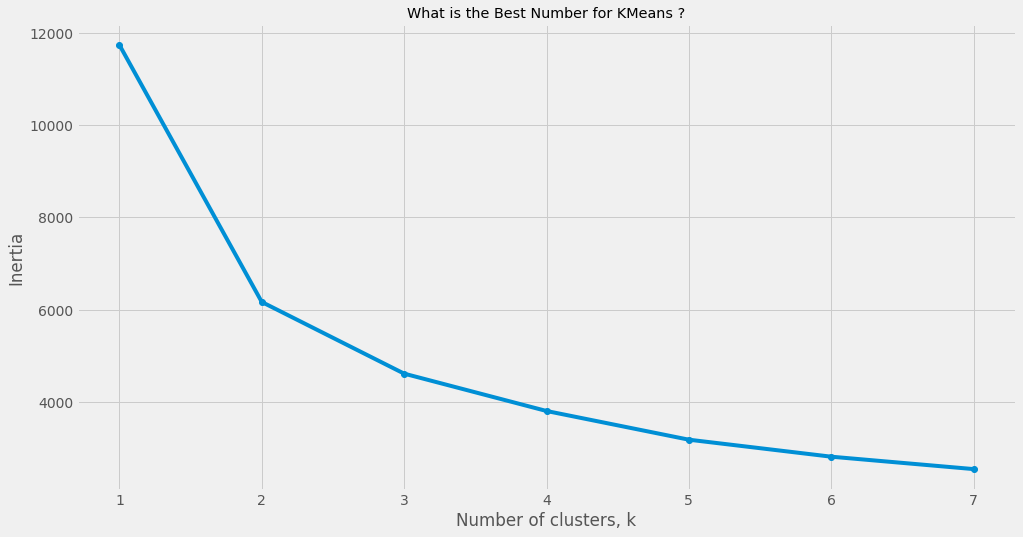

In [ ]:
from sklearn.cluster import KMeans

#First : Get the Best KMeans 
ks = range(1,8)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

In [ ]:
# clustering
kc = KMeans(n_clusters= 3, random_state=1)
kc.fit(rfm_normalized)

#Create a cluster label column in the original DataFrame
cluster_labels = kc.labels_

#Calculate average RFM values and size for each cluster:
rfm_rfm_k3 = rfm_rfm.assign(K_Cluster = cluster_labels)

#Calculate average RFM values and sizes for each cluster:
rfm_rfm_k3.groupby('K_Cluster').agg({'Recency': 'mean','Frequency': 'mean',
                                         'Monetary': ['mean', 'count'],}).round(0)

Recency Frequency  Monetary      
             mean      mean      mean count
K_Cluster                                  
0            68.0     427.0  101203.0  1282
1            84.0      74.0    5058.0  1504
2           260.0      43.0    3514.0  1125

In [ ]:
rfm_normalized = pd.DataFrame(rfm_normalized,index=rfm_rfm.index,columns=rfm_rfm.columns)
rfm_normalized['K_Cluster'] = kc.labels_
rfm_normalized['General_Segment'] = rfm['General_Segment']
rfm_normalized.reset_index(inplace = True)

#Melt the data into a long format so RFM values and metric names are stored in 1 column each
rfm_melt = pd.melt(rfm_normalized,id_vars=['UserId','General_Segment','K_Cluster'],value_vars=['Recency', 'Frequency', 'Monetary'],
var_name='Metric',value_name='Value')
rfm_melt.head()

,UserId,General_Segment,K_Cluster,Metric,Value
0,259266,Sliver,2,Recency,1.842516
1,267687,Gold,0,Recency,-1.314118
2,267708,Gold,0,Recency,-1.387128
3,267729,Gold,0,Recency,-1.278328
4,269220,Gold,1,Recency,-1.278328


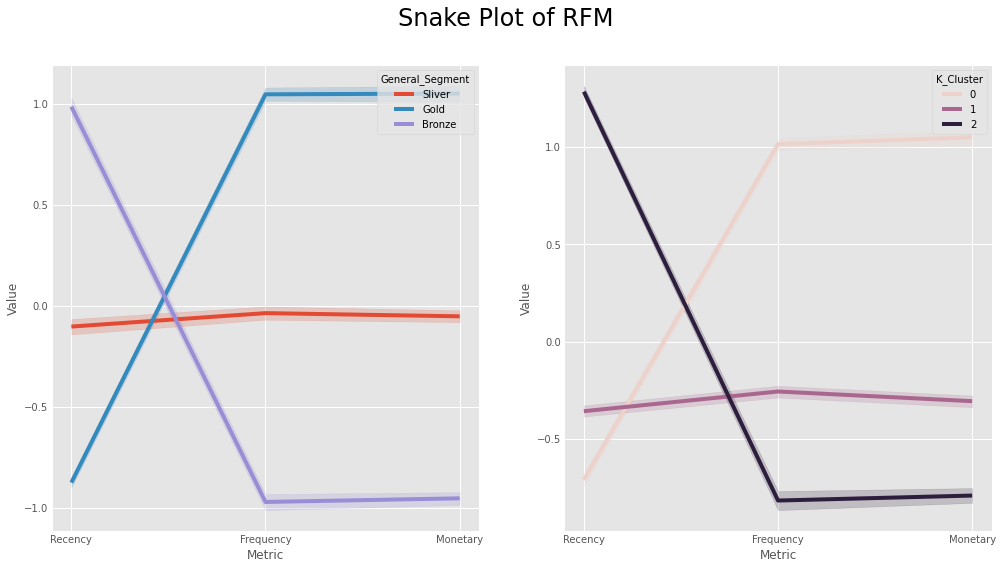

In [ ]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 8))
sns.lineplot(x = 'Metric', y = 'Value', hue = 'General_Segment', data = rfm_melt,ax=ax1)

# a snake plot with K-Means
sns.lineplot(x = 'Metric', y = 'Value', hue = 'K_Cluster', data = rfm_melt,ax=ax2)

plt.suptitle("Snake Plot of RFM",fontsize=24) #make title fontsize subtitle 
plt.show()

In [ ]:
# The further a ratio is from 0, the more important that attribute is for a segment relative to the total population
cluster_avg = rfm_rfm_k3.groupby(['K_Cluster']).mean()
population_avg = rfm_rfm.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,Monetary
K_Cluster,,,
0,-0.48,1.36,1.80
1,-0.35,-0.59,-0.86
2,1.01,-0.76,-0.90


In [ ]:
# the mean value in total 
total_avg = rfm.iloc[:, 0:3].mean()
# calculate the proportional gap with total mean
cluster_avg = rfm.groupby('General_Segment').mean().iloc[:, 0:3]
prop_rfm = cluster_avg/total_avg - 1
prop_rfm.round(2)

,Recency,Frequency,Monetary
General_Segment,,,
Bronze,0.75,-0.83,-0.94
Gold,-0.56,1.49,0.05
Sliver,-0.15,-0.45,0.65


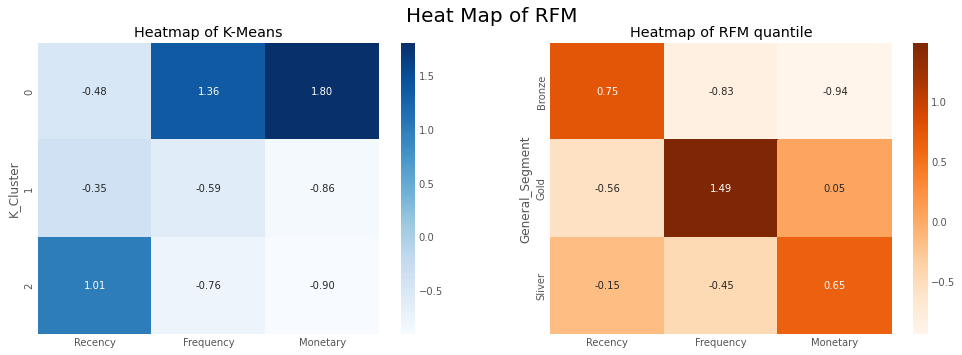

In [ ]:
# heatmap with RFM
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='Blues',ax=ax1)
ax1.set(title = "Heatmap of K-Means")

# a snake plot with K-Means
sns.heatmap(prop_rfm, cmap= 'Oranges', fmt= '.2f', annot = True,ax=ax2)
ax2.set(title = "Heatmap of RFM quantile")

plt.suptitle("Heat Map of RFM",fontsize=20) #make title fontsize subtitle 

plt.show()